In [1]:
import sounddevice as sd

In [2]:
from scipy.io.wavfile import write

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
duration = 1
sample_freq = 22050

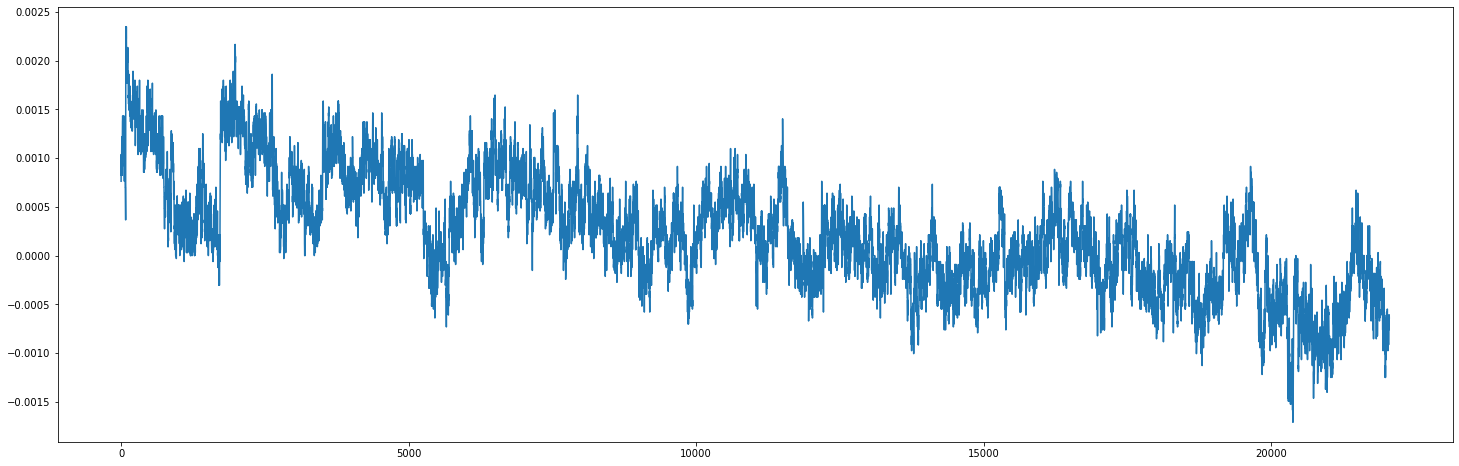

In [6]:
recording = sd.rec(int(duration*sample_freq),sample_freq,channels=1)
sd.wait()
plt.figure(figsize=(25,8))
plt.plot(recording)

In [7]:
recording

array([[ 0.00076294],
       [ 0.0010376 ],
       [ 0.00088501],
       ...,
       [-0.00061035],
       [-0.00061035],
       [-0.00064087]], dtype=float32)

In [8]:
recording.shape

(22050, 1)

In [9]:
write('hi.wav',sample_freq,recording)

In [11]:
import IPython.display as ipd
ipd.Audio('hi.wav')

In [12]:
import librosa as alib

In [13]:
sig, rate = alib.load('hi.wav')

In [14]:
rate

22050

In [15]:
sig

array([ 0.00076294,  0.0010376 ,  0.00088501, ..., -0.00061035,
       -0.00061035, -0.00064087], dtype=float32)

In [16]:
22050/512

43.06640625

In [17]:
feats = alib.feature.mfcc(sig,n_mfcc=10)
feats


array([[-6.19941467e+02, -6.29149048e+02, -6.33149109e+02,
        -6.29719604e+02, -6.31581604e+02, -6.31676331e+02,
        -6.34809509e+02, -6.35488892e+02, -6.39643677e+02,
        -6.37306152e+02, -6.37099854e+02, -6.34260132e+02,
        -6.36533142e+02, -6.36427917e+02, -6.36692688e+02,
        -6.33720215e+02, -6.35808899e+02, -6.39173828e+02,
        -6.41135620e+02, -6.43048035e+02, -6.48440918e+02,
        -6.46455688e+02, -6.41479309e+02, -6.37574402e+02,
        -6.36427795e+02, -6.43127014e+02, -6.40318054e+02,
        -6.41214111e+02, -6.42490601e+02, -6.43753662e+02,
        -6.42432251e+02, -6.37944519e+02, -6.37486084e+02,
        -6.37848389e+02, -6.37208130e+02, -6.39703186e+02,
        -6.38620667e+02, -6.38296509e+02, -6.33699951e+02,
        -6.26827393e+02, -6.19950012e+02, -6.30153809e+02,
        -6.32380676e+02, -6.33346680e+02],
       [ 9.14560547e+01,  9.03267975e+01,  8.77578430e+01,
         8.98507996e+01,  8.96866913e+01,  8.64236755e+01,
         8.80

In [18]:
feats.shape

(10, 44)

In [19]:
feats.mean(axis=1).shape

(10,)

In [20]:
import pandas as pd

In [21]:
def extract_features(sig=None,rate=None, path=None):
    if path:
        sig,rate = alib.load(path)
    mfcc = alib.feature.mfcc(sig,rate,n_mfcc=30)
    stft = alib.feature.chroma_stft(sig,rate,n_chroma=12)
    zcr = alib.feature.zero_crossing_rate(sig,rate)
    mfcc_mean = mfcc.mean(axis=1).tolist()
    mfcc_var = mfcc.var(axis=1).tolist()
    stft_mean = [stft.mean()]
    stft_var = [stft.var()]
    zcr_mean = [zcr.mean()]
    zcr_var = [zcr.var()]   
    return mfcc_mean + mfcc_var + stft_mean + stft_var + zcr_mean + zcr_var

In [22]:
features = extract_features(path = 'hi.wav')

In [23]:

df = pd.DataFrame({i:[] for i in range(65)})

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
